In [2]:
#Loading the dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
dataset=pd.read_csv("/content/drive/MyDrive/Dataset/Churn_Modelling.csv")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


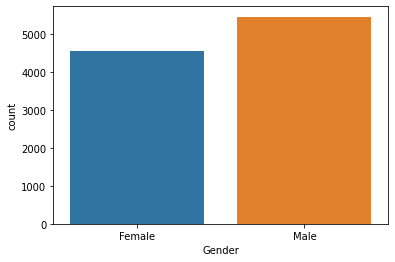

In [4]:
#Univariant analysis
sb.countplot(dataset.Gender)

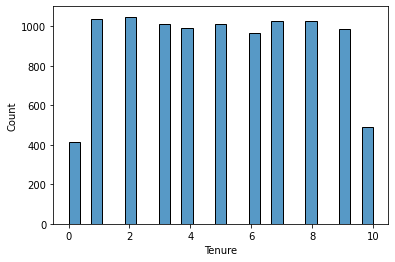

In [ ]:
#Univariant analysis
sb.histplot(dataset.Tenure)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 200000.0)

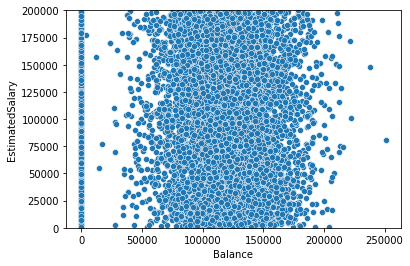

In [ ]:
#Bivariant analysis
sb.scatterplot(dataset.Balance,dataset.EstimatedSalary)
plt.ylim(0,200000)

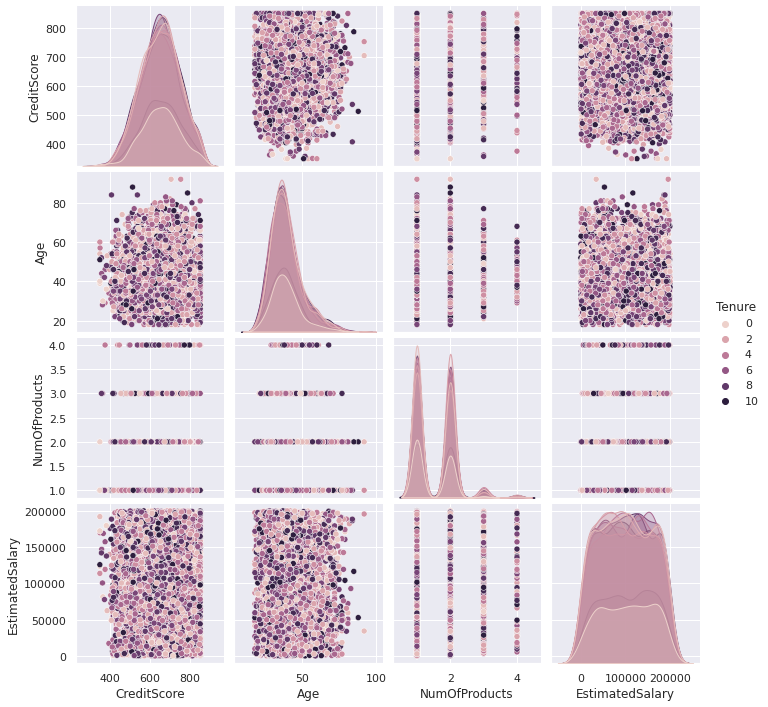

In [ ]:
#Multivariant analysis
sb.pairplot(dataset[["CreditScore","Geography","Gender","Age","Tenure","NumOfProducts","EstimatedSalary"]],hue="Tenure")

In [ ]:
#Descriptive statistics on the given dataset
dataset.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
dataset.describe(include=["object"])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
#Handling missing values in a dataset
dataset.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()
#There is no missing(null) values in the given dataset

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Finding and replacing the outliers
d=dataset[(dataset["EstimatedSalary"]>50000)&(dataset["EstimatedSalary"]<100000)]#Finding outliers
d


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,9986,15586914,Nepean,659,France,Male,36,6,123841.49,2,1,0,96833.00,0
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0


In [ ]:
dataset["EstimatedSalary"] = dataset["EstimatedSalary"].mask(dataset["EstimatedSalary"] >100000, 1)#replacing the outliers
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,1.00,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,1.00,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,1.00,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,1.00,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#Checking categorical columns and performing encoding
df = [col for col in dataset.columns if col not in dataset.describe().columns]
df

['Surname', 'Geography', 'Gender']

In [31]:
#Performing Encoding
from sklearn.preprocessing import OneHotEncoder
import numpy as np
en= OneHotEncoder(dtype=np.int64, handle_unknown='ignore')
encod= pd.DataFrame(en.fit_transform(dataset[['Gender']]).toarray(),)
d = dataset.join(encod)
d.rename(columns={0:'Female',1:'Male'},inplace=True)
d

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [41]:
#Splitting the data into independent variables
from sklearn import preprocessing 
Independent = dataset.iloc[:, :-1].values
Independent

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [45]:
#Splitting the data into dependent variables
Dependent= dataset.iloc[:, -1].values
Dependent

array([1, 0, 1, ..., 1, 1, 0])

In [51]:
#Scaling the independent variables
data= dataset.filter(["Age", "Tenure", "Balance", "EstimatedSalary"], axis = 1)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
datamms = mms.fit_transform(data)
datamms_df = pd.DataFrame(datamms,
                              columns = data.columns)
datamms_df.describe()


,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.282727,0.501280,0.304848,0.500441
std,0.141727,0.289217,0.248696,0.287580
min,0.000000,0.000000,0.000000,0.000000
25%,0.189189,0.300000,0.000000,0.254977
50%,0.256757,0.500000,0.387402,0.500960
75%,0.351351,0.700000,0.508749,0.746955
max,1.000000,1.000000,1.000000,1.000000


In [58]:
#Splitting the data into training and testing
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
features=["CreditScore", "Age", "Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]
X = dataset.loc[:, features]
y = dataset.loc[:, ['Exited']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6700, 8) (3300, 8) (6700, 1) (3300, 1)
